In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.shape

(891, 12)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Text(0, 0.5, 'Total')

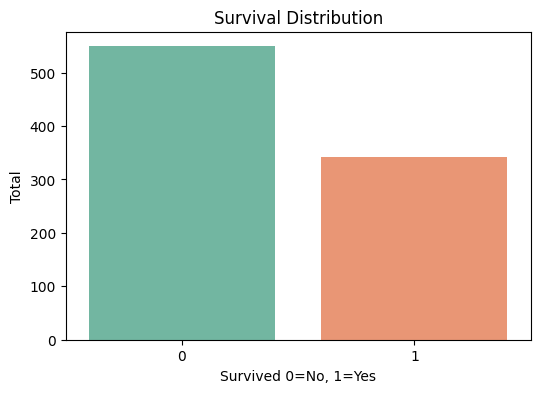

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived', palette='Set2')
plt.title("Survival Distribution")
plt.xlabel("Survived 0=No, 1=Yes")
plt.ylabel("Total")

## Survival by Gender

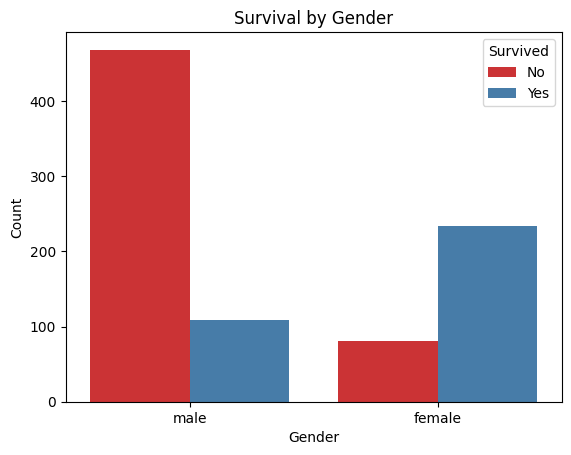

In [21]:
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set1')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

## Survival by Passenger Class

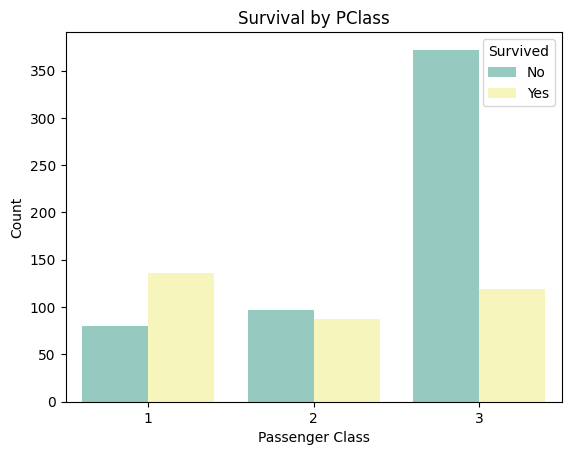

In [23]:
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set3')
plt.title('Survival by PClass')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

## Survival by Port Embarked

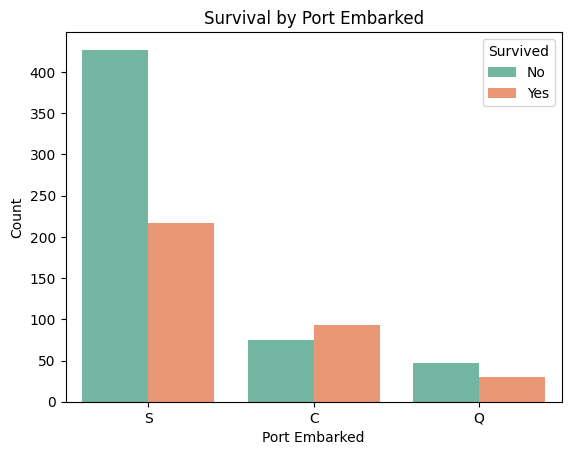

In [25]:
sns.countplot(data=df, x='Embarked', hue='Survived', palette='Set2')
plt.title('Survival by Port Embarked')
plt.xlabel('Port Embarked')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

## Age Distribution

<Axes: >

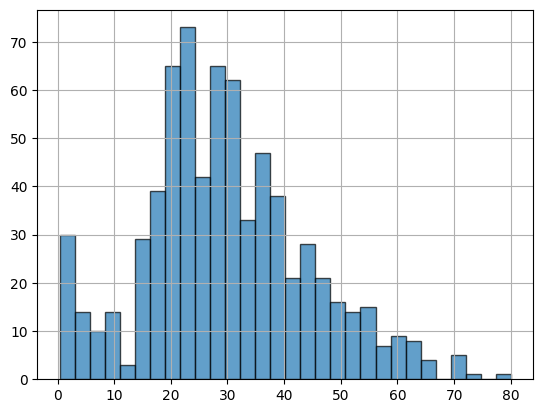

In [28]:
df['Age'].hist(bins=30, edgecolor='black', alpha=0.7)

<Axes: >

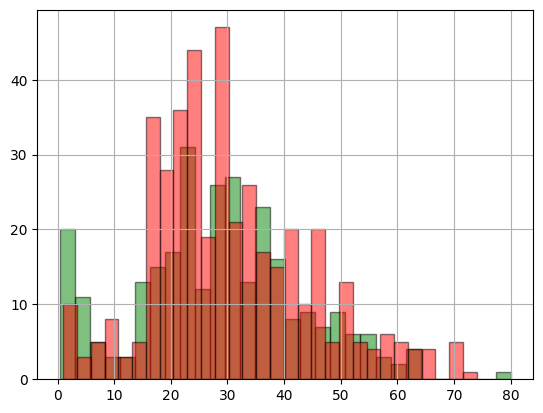

In [33]:
df[df['Survived']==1]['Age'].hist(bins=30, edgecolor='black', alpha=0.5, color='green')
df[df['Survived']==0]['Age'].hist(bins=30, edgecolor='black', alpha=0.5, color='red')

In [34]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

<Axes: xlabel='FamilySize', ylabel='count'>

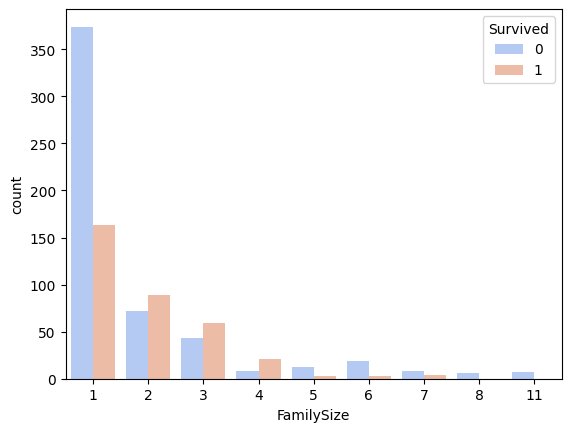

In [36]:
sns.countplot(data=df, x='FamilySize', hue='Survived', palette='coolwarm')

In [37]:
df['GenderID'] = df['Sex'].map({'male': 0, 'female': 1})

In [41]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  GenderID     891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [44]:
numeric_df = df[['Survived', 'Pclass', 'Age', 'FamilySize', 'Fare', 'GenderID']]

In [45]:
corr_matrix = numeric_df.corr()

<Axes: >

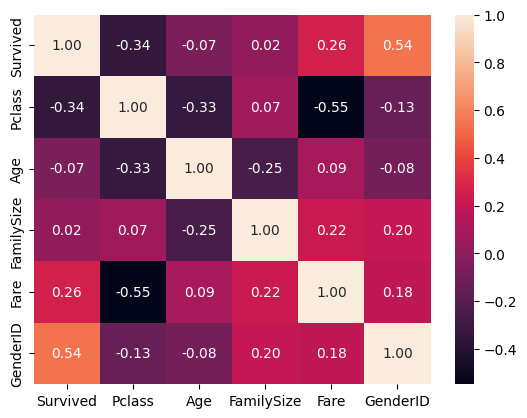

In [48]:
sns.heatmap(corr_matrix, annot=True, fmt='.2f')